In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
# Load data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Add random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
# Define autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [5]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.3311 - val_loss: 0.1816
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.1733 - val_loss: 0.1552
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.1532 - val_loss: 0.1435
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1423 - val_loss: 0.1355
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1355 - val_loss: 0.1311
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1317 - val_loss: 0.1293
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1290 - val_loss: 0.1264
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1263 - val_loss: 0.1247
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1248 - val_loss: 0.1231
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1235 - val_loss: 0.1220


In [6]:
# Predict on noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


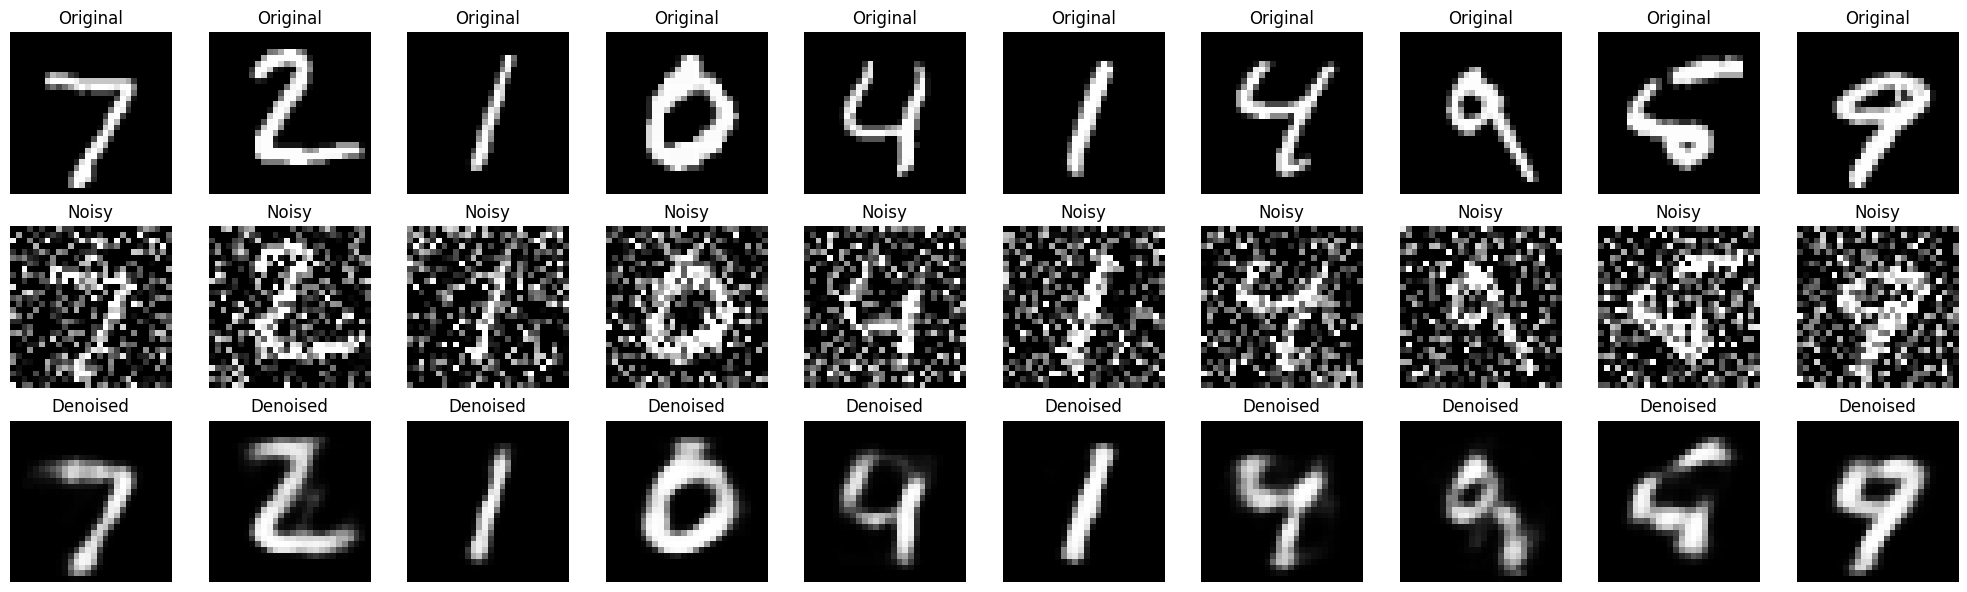

In [7]:
# Display original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_title("Noisy")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.set_title("Denoised")
    plt.axis('off')

plt.tight_layout()
plt.show()